In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
crop_production = pd.read_csv(r"crop_production.csv")
crop_production.shape

(246091, 7)

In [3]:
crop_production.head()


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [4]:
crop_production.describe()

,Crop_Year,Area,Production
count,246091.000000,2.460910e+05,2.423610e+05
mean,2005.643018,1.200282e+04,5.825034e+05
std,4.952164,5.052340e+04,1.706581e+07
min,1997.000000,4.000000e-02,0.000000e+00
25%,2002.000000,8.000000e+01,8.800000e+01
50%,2006.000000,5.820000e+02,7.290000e+02
75%,2010.000000,4.392000e+03,7.023000e+03
max,2015.000000,8.580100e+06,1.250800e+09


In [5]:
#check whether any column has null value or not
crop_production.isnull().any()

State_Name       False
District_Name    False
Crop_Year        False
Season           False
Crop             False
Area             False
Production        True
dtype: bool

In [6]:
crop_production.duplicated().any()

False

**We drop all the rows which contains null value because our dataset is big so if we drop some rows it can't effect our model**

In [7]:
crop_production.dropna(inplace=True)
crop_production.shape

(242361, 7)

**Plot box plot to see outliers**

<AxesSubplot:xlabel='Production'>

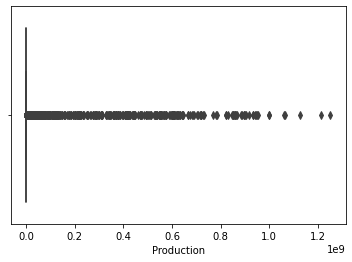

In [8]:
sns.boxplot(crop_production['Production'])

**Remove some outliers for dataset we quantile technique to remove outliers**

In [9]:
q_low = crop_production["Production"].quantile(0.08)
q_hi  = crop_production["Production"].quantile(0.92)

crop_production = crop_production[(crop_production["Production"] < q_hi) & (crop_production["Production"]> q_low)]

In [10]:
crop_production.shape

(203455, 7)

<AxesSubplot:xlabel='Production'>

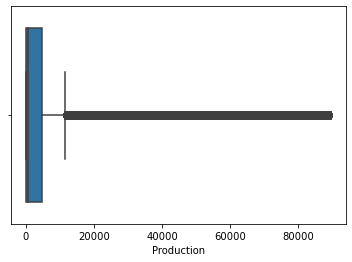

In [11]:
sns.boxplot(crop_production['Production'])

In [12]:
crop_production.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0


**We divided all state into different zones like north,south,central etc. to get new zone columns we define get_zonal_names function which take dataframe row as input and return corresponding zone of that state**

In [13]:
north_india = ['Jammu and Kashmir', 'Punjab', 'Himachal Pradesh', 'Haryana', 'Uttarakhand', 'Uttar Pradesh', 'Chandigarh']
east_india = ['Bihar', 'Odisha', 'Jharkhand', 'West Bengal']
south_india = ['Andhra Pradesh', 'Karnataka', 'Kerala' ,'Tamil Nadu', 'Telangana']
west_india = ['Rajasthan' , 'Gujarat', 'Goa','Maharashtra','Goa']
central_india = ['Madhya Pradesh', 'Chhattisgarh']
north_east_india = ['Assam', 'Sikkim', 'Nagaland', 'Meghalaya', 'Manipur', 'Mizoram', 'Tripura', 'Arunachal Pradesh']
ut_india = ['Andaman and Nicobar Islands', 'Dadra and Nagar Haveli', 'Puducherry']

In [14]:
def get_zonal_names(row):
    if row['State_Name'].strip() in north_india:
        val = 'North Zone'
    elif row['State_Name'].strip()  in south_india:
        val = 'South Zone'
    elif row['State_Name'].strip()  in east_india:
        val = 'East Zone'
    elif row['State_Name'].strip()  in west_india:
        val = 'West Zone'
    elif row['State_Name'].strip()  in central_india:
        val = 'Central Zone'
    elif row['State_Name'].strip()  in north_east_india:
        val = 'NE Zone'
    elif row['State_Name'].strip()  in ut_india:
        val = 'Union Terr'
    else:
        val = 'No Value'
    return val

crop_production['Zones'] = crop_production.apply(get_zonal_names, axis=1)
crop_production['Zones'].unique()

array(['Union Terr', 'South Zone', 'NE Zone', 'East Zone', 'North Zone',
       'Central Zone', 'West Zone'], dtype=object)

In [15]:
#dataset with new columns zones
crop_production.head()

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Union Terr
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Union Terr
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Union Terr
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Union Terr
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0,Union Terr


In [16]:
# copy the dataset into new dataframe 
final_df=crop_production.copy()


**convert all state_name,District_name,Season of crop,Crop name into lower case and remove spaces for them**

In [17]:
final_df['State_Name'] = final_df['State_Name'].apply(lambda x:x.replace(' ','').lower())
final_df['District_Name'] = final_df['District_Name'].apply(lambda x:x.replace(' ','').lower())
final_df['Season'] = final_df['Season'].apply(lambda x:x.replace(' ','').lower())
final_df['Crop'] = final_df['Crop'].apply(lambda x:x.replace(' ','').lower())
final_df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones
0,andamanandnicobarislands,nicobars,2000,kharif,arecanut,1254.0,2000.0,Union Terr
2,andamanandnicobarislands,nicobars,2000,kharif,rice,102.0,321.0,Union Terr
3,andamanandnicobarislands,nicobars,2000,wholeyear,banana,176.0,641.0,Union Terr
4,andamanandnicobarislands,nicobars,2000,wholeyear,cashewnut,720.0,165.0,Union Terr
6,andamanandnicobarislands,nicobars,2000,wholeyear,dryginger,36.0,100.0,Union Terr
...,...,...,...,...,...,...,...,...
246085,westbengal,purulia,2014,summer,maize,325.0,2039.0,East Zone
246086,westbengal,purulia,2014,summer,rice,306.0,801.0,East Zone
246087,westbengal,purulia,2014,summer,sesamum,627.0,463.0,East Zone
246088,westbengal,purulia,2014,wholeyear,sugarcane,324.0,16250.0,East Zone


In [18]:
final_df=final_df.drop(['Crop_Year'],axis=1)
final_df

,State_Name,District_Name,Season,Crop,Area,Production,Zones
0,andamanandnicobarislands,nicobars,kharif,arecanut,1254.0,2000.0,Union Terr
2,andamanandnicobarislands,nicobars,kharif,rice,102.0,321.0,Union Terr
3,andamanandnicobarislands,nicobars,wholeyear,banana,176.0,641.0,Union Terr
4,andamanandnicobarislands,nicobars,wholeyear,cashewnut,720.0,165.0,Union Terr
6,andamanandnicobarislands,nicobars,wholeyear,dryginger,36.0,100.0,Union Terr
...,...,...,...,...,...,...,...
246085,westbengal,purulia,summer,maize,325.0,2039.0,East Zone
246086,westbengal,purulia,summer,rice,306.0,801.0,East Zone
246087,westbengal,purulia,summer,sesamum,627.0,463.0,East Zone
246088,westbengal,purulia,wholeyear,sugarcane,324.0,16250.0,East Zone


**Import LabelEncoder form sklearn to convert state_name,district_name,season ,crop,zone into numerical value**

In [19]:
from sklearn.preprocessing import LabelEncoder

In [20]:
state_lb  =LabelEncoder()
final_df["State_Name"]=state_lb.fit_transform(final_df['State_Name'])

dis_lb = LabelEncoder()
final_df['District_Name']=dis_lb.fit_transform(final_df['District_Name'])

In [21]:
season_lb = LabelEncoder()
final_df['Season']=season_lb.fit_transform(final_df['Season'])

crop_lb = LabelEncoder()
final_df['Crop']=crop_lb.fit_transform(final_df['Crop'])

zone_lb = LabelEncoder()
final_df['Zones']=zone_lb.fit_transform(final_df['Zones'])


In [22]:
final_df

,State_Name,District_Name,Season,Crop,Area,Production,Zones
0,0,426,1,1,1254.0,2000.0,5
2,0,426,1,82,102.0,321.0,5
3,0,426,4,5,176.0,641.0,5
4,0,426,4,18,720.0,165.0,5
6,0,426,4,33,36.0,100.0,5
...,...,...,...,...,...,...,...
246085,32,470,3,52,325.0,2039.0,1
246086,32,470,3,82,306.0,801.0,1
246087,32,470,3,89,627.0,463.0,1
246088,32,470,4,92,324.0,16250.0,1


In [23]:
final_df.reset_index(drop=True,inplace=True)
final_df


,State_Name,District_Name,Season,Crop,Area,Production,Zones
0,0,426,1,1,1254.0,2000.0,5
1,0,426,1,82,102.0,321.0,5
2,0,426,4,5,176.0,641.0,5
3,0,426,4,18,720.0,165.0,5
4,0,426,4,33,36.0,100.0,5
...,...,...,...,...,...,...,...
203450,32,470,3,52,325.0,2039.0,1
203451,32,470,3,82,306.0,801.0,1
203452,32,470,3,89,627.0,463.0,1
203453,32,470,4,92,324.0,16250.0,1


* **For Train the model we use different different regression Machine learning algorithm . like RandomForestRegressor,LineaeRegression,Ridge,XGBRegressor.**
* We use Regression model because our target column(Porduction ) is continues value 

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge

from xgboost import XGBRegressor


In [35]:
X = final_df.drop(["Production"],axis=1)
y= final_df.Production

In [36]:
X_train,X_test,y_train,y_test  = train_test_split(X,y,test_size=0.2,random_state=10)
model =RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [38]:
#Score of random forest model
Rf_score = model.score(X_test,y_test)
Rf_score

0.8736210400541748

In [39]:
model_xgb = XGBRegressor().fit(X_train,y_train)
xgb_Score = model_xgb.score(X_test,y_test)
xgb_Score

0.8584203545022081

In [40]:
model_lr = LinearRegression().fit(X_train,y_train)

model_rg = Ridge().fit(X_train,y_train)

In [41]:
lr_score =  model_lr.score(X_test,y_test)
rg_score = model_rg.score(X_test,y_test)
print(lr_score,rg_score)

0.2998574481018408 0.29985744920410473


In [42]:
data ={'Algorithm':['Random Forest ','Linear Regression','Ridge','XGBoost'],
      'Score':[Rf_score,lr_score,rg_score,xgb_Score],
      }
df =pd.DataFrame(data)
df

,Algorithm,Score
0,Random Forest,0.873621
1,Linear Regression,0.299857
2,Ridge,0.299857
3,XGBoost,0.858420


<function matplotlib.pyplot.show(close=None, block=None)>

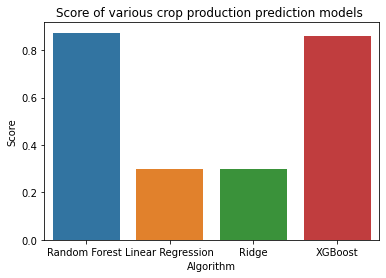

In [43]:
sns.barplot(x=df['Algorithm'],y=df['Score'])
plt.title("Score of various crop production prediction models ")
plt.show

**We can clearly see that the Ridge,Linear regression model performs very poorly while the RandomForestRegressor performs very well with a score of 87%, so we use the random forest model for our predication.**

In [44]:
from sklearn.metrics import mean_absolute_error
y_pred = model.predict(X_test)


In [46]:
mae = mean_absolute_error(y_test,y_pred)
mae

1751.2462711682374

In [51]:
ls = np.arange(len(y_pred))


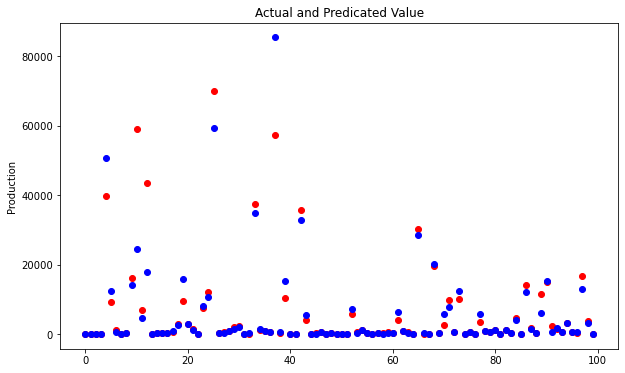

In [64]:
plt.figure(figsize=(10,6))
plt.scatter(ls[:100],y_pred[:100],color='red')
plt.scatter(ls[:100],y_test[:100],color='blue')
plt.ylabel("Production")
plt.title("Actual and Predicated Value")
plt.show()

**In Above figure `Red Dots` shows the Predicated Value `Blue Dots ` Shows Actual value show we can see the difference between Actual and Predicated Value**

In [65]:
crop_production

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,Zones
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,Union Terr
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,Union Terr
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,Union Terr
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,Union Terr
6,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Dry ginger,36.0,100.0,Union Terr
...,...,...,...,...,...,...,...,...
246085,West Bengal,PURULIA,2014,Summer,Maize,325.0,2039.0,East Zone
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0,East Zone
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0,East Zone
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0,East Zone


In [45]:
import pickle
filename = 'production_model.pkl'
pickle.dump(model, open(filename, 'wb'))

In [40]:
X_test.iloc[0]

State_Name       31.0
District_Name    67.0
Season            1.0
Crop             39.0
Area             35.0
Zones             3.0
Name: 170392, dtype: float64

In [41]:
model.predict(X_test)

array([2.90600000e+01, 1.00930000e+02, 2.29500000e+01, ...,
       5.16686905e+01, 2.62109500e+04, 4.35754000e+03])